## Vertical gradients of Rdark - impacts on coexistence - 2 pft BCI simulations 

In [1]:
from scipy.stats import qmc
import numpy as np

import csv
import xarray as xr
import pandas as pd
import os
import netCDF4 as nc4
import sys
import shutil
from tempfile import TemporaryFile                                                                                                                                 
import argparse                                                                                                                                                                                                                                                                                                       
import tempfile 
import random
import re
import math

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import cm
import matplotlib.colors as mcolors
from matplotlib.colors import Normalize
from matplotlib.colors import BoundaryNorm

import functions_py.fates_xarray_functions as fa


### Load the FATES runs

In [2]:
fates = '/pscratch/sd/j/jneedham/elm_runs/bci/mar24/bci_rdark_ensemble_2pfts_0324.E74c582a640-Feff4c934.2024-03-25/run/bci_rdark_ensemble_2pfts_0324.E74c582a640-Feff4c934.2024-03-25.h0.ensemble.sofar.nc'
fates = xr.open_dataset(fates,  decode_times=False)
time = fates.variables['time'] / 365.
cohort_size_bins = fates.variables['fates_levscls'][:]
nsizebins = len(cohort_size_bins)

tave_start =  20
tave_stop = 30

ninst = 32

### AGB 

In [3]:
AGB_PF = fa.scpf_to_scls_by_pft(fates.FATES_VEGC_ABOVEGROUND_SZPF, fates)
AGB_PF = AGB_PF.sum(dim='fates_levscls')

In [4]:
print(AGB_PF.shape)

(32, 301, 2, 1)


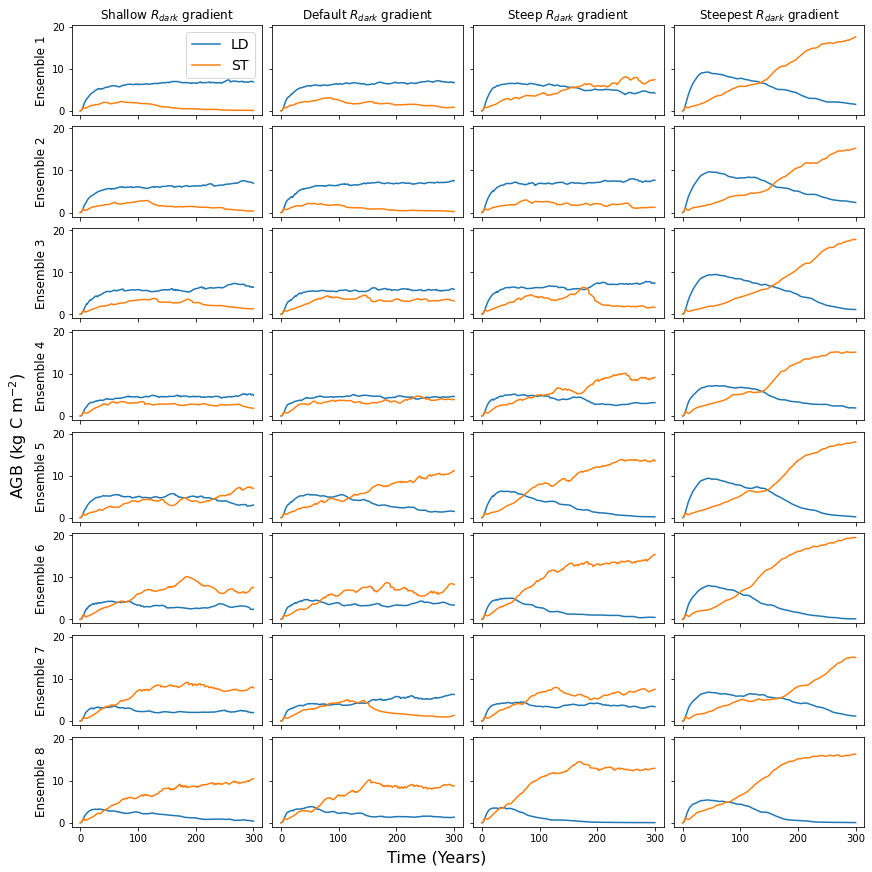

In [17]:
fig1, axs = plt.subplots(nrows=8,ncols=4, figsize=(12,12), constrained_layout=True, sharex=True, sharey=True)

incr = 0

# Change the order of the rows so they reflect decreasing dominance by LD 
counter = [16,17,18,19, 0,1,2,3, 28,29,30,31, 12,13,14,15, 8,9,10,11, 20,21,22,23, 4,5,6,7, 24,25,26,27]

for i in range(0,8):
    for j in range(0,4):
    
        axs[i,j].plot(time, AGB_PF[counter[incr],:,0],label = 'LD')  
        axs[i,j].plot(time, AGB_PF[counter[incr],:,1], label = 'ST')   
        if incr == 0:
            axs[i,j].legend(prop={'size':14})
        incr = incr + 1    

fig1.supxlabel(r'Time (Years)', fontsize=16)
fig1.supylabel(r'AGB (kg C m$^{-2}$)', fontsize=16)

cols = ['v {}'.format(col) for col in range(1, 5)]
for ax, col in zip(axs[0], cols):
    ax.set_title(col)
    
ensembles = ['Ensemble {}'.format(col) for col in range(1, 9)]    
for ax, row in zip(axs[:,0], ensembles):
    ax.set_ylabel(row, size='large')    
    
axs[0,0].set_title(r'Shallow $R_{dark}$ gradient')
axs[0,1].set_title(r'Default $R_{dark}$ gradient')
axs[0,2].set_title(r'Steep $R_{dark}$ gradient')
axs[0,3].set_title(r'Steepest $R_{dark}$ gradient')
    
plt.savefig('/global/homes/j/jneedham/Rdark_vert_figs/BCI_coexistence.png', 
            bbox_inches='tight', facecolor='white')

plt.savefig('/global/homes/j/jneedham/Rdark_vert_figs/BCI_coexistence.pdf', 
            bbox_inches='tight', facecolor='white')    